# Basic Image Processing using Scikit-Image and OpenCV

In [70]:
def display(image):
    """
    This function displays Image as well as its shape and data type
    """
    print(image.shape)
    print(image.dtype)
    plt.imshow(image, cmap="gray") 

## Scikit-Image

In [71]:
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.filters import gaussian, sobel

(1104, 1376)
float64


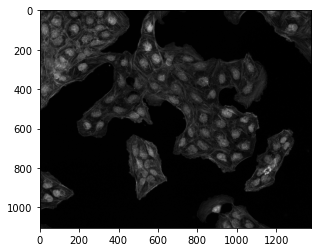

In [72]:
# If we open as as_grey = True -> Image data type is float64 and values are between 0 and 1, otherwise 0 - 255 int8
img = io.imread("Data/images/Osteosarcoma_01.tif", as_gray=True)
display(img)

(276, 344)
float64


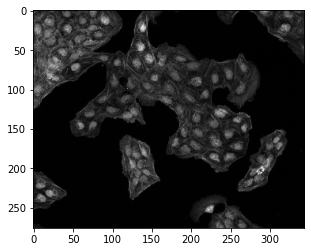

In [73]:
#Rescale, resize image by a given factor. While rescaling image
#gaussian smoothing can performed to avoid anti aliasing artifacts.
img_rescaled = rescale(img, 1.0 / 4.0, anti_aliasing=False)  #Check rescales image size in variable explorer
display(img_rescaled)

(200, 200)
float64


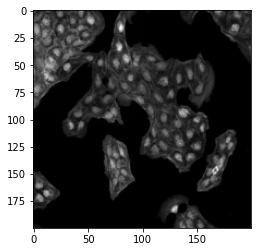

In [74]:
#Resize, resize image to given dimensions (shape)
img_resized = resize(img, (200, 200), anti_aliasing=True)
display(img_resized)

(276, 459)
float64


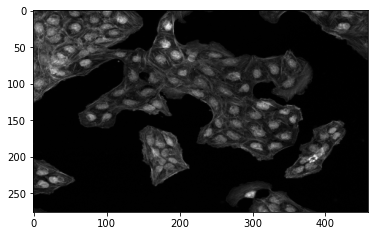

In [75]:
#Downscale, downsample using local mean of elements of each block defined by user
img_downscaled = downscale_local_mean(img, (4, 3))
display(img_downscaled)

In [76]:
# We only use rescale generally

##### Gaussian Smootning
It reduces Noise

(1104, 1376, 3)
uint8


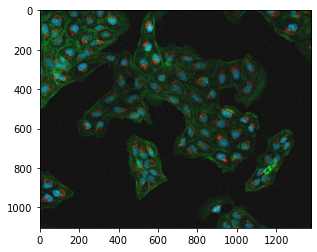

In [77]:
img = io.imread("Data/images/Osteosarcoma_01_25Sigma_noise.tif")
display(img)

<ipython-input-78-74a8459d062e>:1: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  gaussian_using_skimage = gaussian(img, sigma=1, mode='constant', cval=0.0)


(1104, 1376, 3)
float64


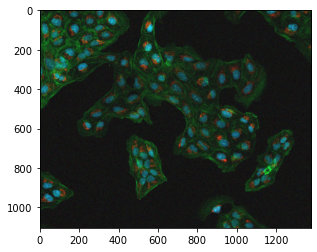

In [78]:
gaussian_using_skimage = gaussian(img, sigma=1, mode='constant', cval=0.0)
display(gaussian_using_skimage)

(1104, 1376)
float64


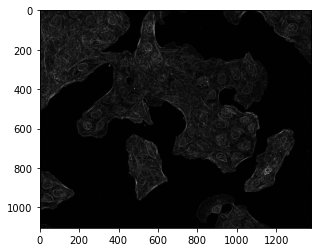

In [79]:
# Sobel
img_gray = io.imread("Data/images/Osteosarcoma_01.tif", as_gray=True)
sobel_img = sobel(img_gray)  #Works only on 2D (gray) images
display(sobel_img)

## OpenCV

In [80]:
import cv2

In [81]:
def display(image):
    """
    This function also 2displays Image as well as its shape and data type
    """
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    print(image.shape)
    print(image.dtype)
    plt.imshow(image) 

(256, 256, 3)
uint8


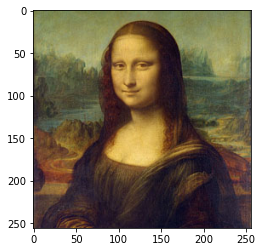

In [82]:
img = cv2.imread("Data/images/monalisa.jpg", 1)   #Color is BGR not RGB
display(img)

(512, 512, 3)
uint8


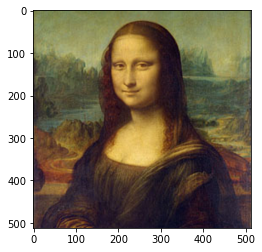

In [83]:
#use cv2.resize. Can specify size or scaling factor.
#Inter_cubic or Inter_linear for zooming.
#Use INTER_AREA for shrinking
#Following xample zooms by 2 times.

resized = cv2.resize(img, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
display(resized)

(256, 256, 3)
uint8


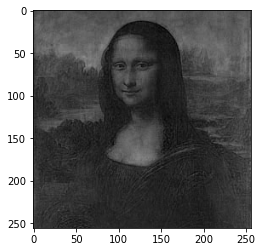

In [84]:
#Split and merging channels
#Show individual color channels in the image
blue = img[:, :, 0]   #Show only blue pic. (BGR so B=0)
green = img[:, :, 1]  #Show only green pixels
red = img[:, :, 2]  #red only
display(blue)
b,g,r = cv2.split(img)

img_merged = cv2.merge((b,g,r))

(1104, 1376, 3)
uint8


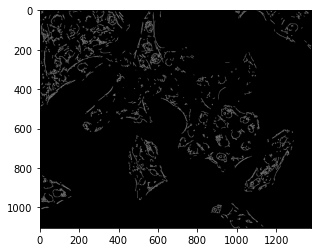

In [85]:
img = cv2.imread("Data/images/Osteosarcoma_01.tif", 0)
edges = cv2.Canny(img,100,200)   #Image, min and max values
display(edges)

In [86]:
print("--Done--")

--Done--
